# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Среднее', 'Два и более высших образования', 'Ученая степень', 'Среднее специальное', 'Высшее', 'Неоконченное высшее'}


MARITAL_STATUS
{'Гражданский брак', 'Вдовец/Вдова', 'Не состоял в браке', 'Разведен(а)', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Управляющая компания', 'СМИ/Реклама/PR-агенства', 'Информационные технологии', 'Банк/Финансы', 'Страхование', 'Строительство', 'Коммунальное хоз-во/Дорожные службы', 'Сборочные производства', 'Маркетинг', 'Недвижимость', 'ЧОП/Детективная д-ть', 'Здравоохранение', 'Другие сферы', 'Энергетика', 'Туризм', 'Юридические услуги/нотариальные услуги', 'Информационные услуги', 'Развлечения/Искусство', 'Ресторанный бизнес/Общественное питание', 'Нефтегазовая промышленность', 'Сельское хозяйство', 'Образование', 'Металлургия/Промышленность/Машиностроение', 'Салоны красоты и здоровья', 'Наука', 'Транспорт', 'Химия/Парфюмерия/Фармацевтика', 'Логистика', 'Торговля', 'Подбор персонала', 'Государственная служба'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
# df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

1) Если указаны вводные данные относительно пропусков, то применяем указанные правила.  
   Пример: PREVIOUS_CARD_NUM_UTILIZED - указано, что nan означает 0. В таком случае 
   заменяем nan на 0
   
2) Если столбец впоследствии не будет использоваться, и будет удален при анализе, можно
   ничего не менять, и удалить столбец.  
   Пример: TP_PROVINCE, REGION_NM (комментарий в Задании 2)
 
    GEN_INDUSTRY                  27420
    GEN_TITLE                     27420
    ORG_TP_STATE                  27420
    ORG_TP_FCAPITAL               27425
    JOB_DIR                       27420
    WORK_TIME                     27416
    
3) Видно, что параметры, связанные с местом и временем работы, не заполнены у равного
   числа человек. Для начала стоит сверить, что это действительно одни и те же клиенты,
   этом можно убедиться удалив строки с nan по одному из параметров и посмотрев 
   информацию, например так:  
   ```
   temp = df.dropna(subset=['GEN_INDUSTRY'])
   temp.info()
   ```
   Учитывая, что пропуски связаны с одним и тем же параметром, то вероятно, что человек
   просто не работает. Это подтверждает тот факт, что такого значения "Не работающий" нет
   ни в одном из параметров.  
   Для того, чтобы не потерять ценных данных, добавим всего параметр - "Не работающий", 
   в котором проставим значение 1 для всех, по кому не заполнены параметры, по остальным
   поставим значение 0.
   
4) В случае наличия пропусков в числовых данных (WORK_TIME), можно заменить их на медиану и или среднее. Чтобы понять, что лучше, построим boxplot и узнаем, насколько велик разброс.    Проверка показала, что есть значения до нескольких тысяч месяцев (явные ошибки в данных, человек не мог работать несколько сотен лет), следовательно лучше использовать Медиану вместо средних.

In [15]:
# temp = df.dropna(subset=['GEN_INDUSTRY'])
# temp.info()

#print(max(df['WORK_TIME']))
# df = df[df['WORK_TIME'] != 2867959.0]


# import seaborn as sns
# sns.boxplot(x='GENDER', y='WORK_TIME', data=df);


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

1) Если признаков больше 2х, то для каждой категории необходимо создать новый столбец со значениями 0-не принадлежит категории и 1-принадлежит категории.
   
2) Если категории подчиняются иерархии, то есть их можно разложит в последовательности по    мере увеличения признака, то иногда можно заменить на числа от 0, 1, 2 и т.д.
   Пример: FAMILY_INCOME
   
3) Если один признак является более укрупненной версией другой, то его можно удалить,
   оставив признак с более мелким дроблением.
   Пример: REGION_NM - указание региона, можно удалить, так как есть более мелкое деление
   на субъекты, например в столбце FACT_ADDRESS_PROVINCE
   
4) Если признаки близки по смыслу и по большей части дублируются, то часть из них можно  удалить. 
    Пример: субъект РФ указан в 4х столбцах. Для того, чтобы алгоритм принял во внимание
            регион, достаточно будет указать наиболее полезный и заполненный - 
            FACT_ADDRESS_PROVINCE. 
            Столбцы 'REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE' 
            можно удалить

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [16]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    # Перечень колонок, которые нужно удалить.
    # Колонки с адресами вероятнее всего дублируются, 
    # поэтому оставим только FACT_ADDRESS_PROVINCE, поскольку фактический адрес
    # более важен, чем адрес регистрации
    # Удаляем столбец с регионами, так как субъекты входят в регионы
    remove_cols = ['AGREEMENT_RK',
                   'REG_ADDRESS_PROVINCE',
                   'POSTAL_ADDRESS_PROVINCE',
                   'TP_PROVINCE',
                   'REGION_NM']
    df_output = df_output.drop(remove_cols, axis=1)
    
    
    # Перечень столбцов, значения которых нужно конвертировать из str во float
    numbers_cols = ['PERSONAL_INCOME',
                    'CREDIT',
                    'FST_PAYMENT',
                    'LOAN_AVG_DLQ_AMT',
                    'LOAN_MAX_DLQ_AMT']
    for nc in numbers_cols:
        df_output[nc] = df_output[nc].map(lambda x: x.replace(',', '.')).astype('float')
        
    # Дополнительный one-hot-vector для учета людей, не имеющих работы
    df_output['НЕ РАБОТАЕТ'] = df_output['GEN_TITLE'].isna().replace(False, 0).replace(True, 1)
    
    # Переводим категории FAMILY_INCOME в числа от 0 до 4 с помощью метода replace
    di = {'до 5000 руб.': 0, 
          'от 5000 до 10000 руб.': 1,
          'от 10000 до 20000 руб.': 2,
          'от 20000 до 50000 руб.': 3,
          'свыше 50000 руб.': 4
           }
    df_output['FAMILY_INCOME'] = df_output['FAMILY_INCOME'].replace(di)
    
    # Заменяем пропуски на нули в колонке PREVIOUS_CARD_NUM_UTILIZED
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    
    # Заменяем пропуски в поле WORK_TIME на Медиану
    MEDIAN = df_output['WORK_TIME'].dropna().median()
    df_output['WORK_TIME'] = df_output['WORK_TIME'].map(lambda x: MEDIAN if np.isnan(x) else x)
    
    # Перечень категориальных признаков, 
    # и разделяем one-hot-vectors с помощью метода get_dummies. По умолчанию get_dummies
    # проставит значения 0 по тем строкам, в которых пропущены значения
    categorize_cols = ['EDUCATION',
                       'MARITAL_STATUS',
                       'GEN_INDUSTRY',
                       'GEN_TITLE',
                       'ORG_TP_STATE',
                       'ORG_TP_FCAPITAL',
                       'JOB_DIR',
                       'FACT_ADDRESS_PROVINCE']
    # конвертируем временно 'sample' в числа, иначе метод выдает ошибку
    df_output['sample'] = df_output['sample'].map(lambda x: 1 if x == 'train' else 0)
    df_output = pd.get_dummies(df_output)
    df_output['sample'] = df_output['sample'].map(lambda x: 'train' if x == 1 else 'test')
    
    return df_output

In [17]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [18]:
X      = df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)

y      = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [19]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

## Your Code Here
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Приведем параметры к единому масштабу


In [20]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_valid)
dtc_predict_proba = dtc.predict_proba(X_valid)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_valid)
rfc_predict_proba = rfc.predict_proba(X_valid)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_valid)
lr_predict_proba = lr.predict_proba(X_valid)

In [21]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print('DecisionTreeClassifier metrics')
print('accuracy', accuracy_score(y_valid, dtc_predict))
print('precision', precision_score(y_valid, dtc_predict))
print('recall', recall_score(y_valid, dtc_predict))
print('')

print('RandomForestClassifier metrics')
print('accuracy', accuracy_score(y_valid, rfc_predict))
print('precision', precision_score(y_valid, rfc_predict))
print('recall', recall_score(y_valid, rfc_predict))
print('')

print('LogisticRegression metrics')
print('accuracy', accuracy_score(y_valid, lr_predict))
print('precision', precision_score(y_valid, lr_predict))
print('recall', recall_score(y_valid, lr_predict))
print('')

DecisionTreeClassifier metrics
accuracy 0.8035909787606744
precision 0.18450184501845018
recall 0.18018018018018017

RandomForestClassifier metrics
accuracy 0.8769432888110357
precision 0.23076923076923078
recall 0.005405405405405406

LogisticRegression metrics
accuracy 0.877819137289249
precision 0.2857142857142857
recall 0.0036036036036036037



In [22]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

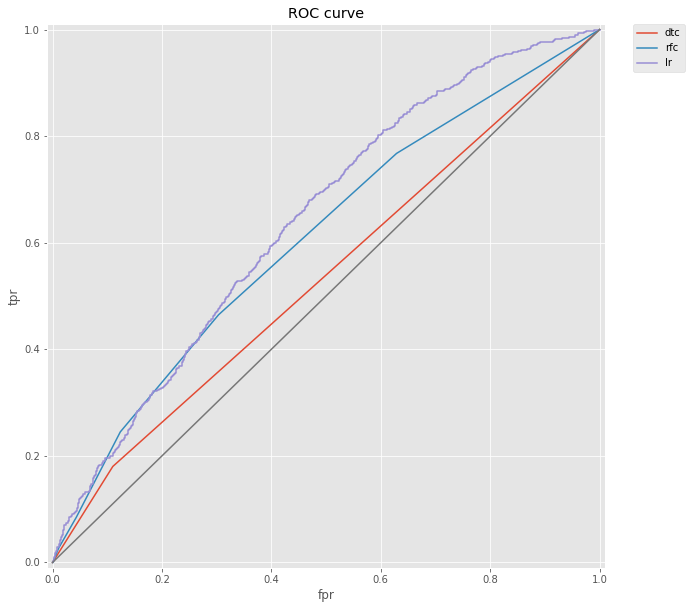

DecisionTreeClassifier roc_auc: 0.5350053443273781
RandomForestClassifier roc_auc: 0.5014564414863517
LogisticRegression roc_auc: 0.5011786711936264



In [24]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_valid, dtc_predict_proba[:,1])
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_valid, rfc_predict_proba[:,1])
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_valid, lr_predict_proba[:,1])
plt.figure(figsize=(10, 10))

plt.plot(dtc_fpr, dtc_tpr, label='dtc')
#plt.legend('dtc')

plt.plot(rfc_fpr, rfc_tpr, label='rfc')
#plt.legend('rfc')

plt.plot(lr_fpr, lr_tpr, label='lr')
#plt.legend('lr')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

plt.show()


dtc_roc_auc_score = roc_auc_score(y_valid, dtc_predict)
print('DecisionTreeClassifier roc_auc: {}'.format(dtc_roc_auc_score))

rfc_roc_auc_score = roc_auc_score(y_valid, rfc_predict)
print('RandomForestClassifier roc_auc: {}'.format(rfc_roc_auc_score))

lr_roc_auc_score = roc_auc_score(y_valid, lr_predict)
print('LogisticRegression roc_auc: {}'.format(lr_roc_auc_score))
print('')

In [25]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

dtc_cross_val_score = cross_val_score(
                            dtc,
                            X,
                            y,
                            scoring='roc_auc',
                            cv=10
                        )

rfc_cross_val_score = cross_val_score(
                            rfc,
                            X,
                            y,
                            scoring='roc_auc',
                            cv=10
                        )

lr_cross_val_score = cross_val_score(
                            lr,
                            X,
                            y,
                            scoring='roc_auc',
                            cv=10
                        )
dtc_mean_k_fold = dtc_cross_val_score.mean()
print('DecisionTreeClassifier k-fold:')
print(dtc_cross_val_score)
print('DecisionTreeClassifier mean k-fold: {}'.format(dtc_mean_k_fold))
print('')

rfc_mean_k_fold = rfc_cross_val_score.mean()
print('RandomForestClassifier k-fold:')
print(rfc_cross_val_score)
print('RandomForestClassifier mean k-fold: {}'.format(rfc_mean_k_fold))
print('')

lr_mean_k_fold = lr_cross_val_score.mean()
print('LogisticRegression k-fold:')
print(lr_cross_val_score)
print('LogisticRegression mean k-fold: {}'.format(lr_mean_k_fold))
print('')


/Users/petrkozyrev/.conda/envs/ML/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


DecisionTreeClassifier k-fold:
[0.51931265 0.52187764 0.56241528 0.53262182 0.57570214 0.50865809
 0.50879405 0.54687481 0.54323071 0.52358881]
DecisionTreeClassifier mean k-fold: 0.5343075996370398

RandomForestClassifier k-fold:
[0.6395326  0.61214978 0.63060881 0.56935123 0.57915879 0.62282621
 0.58274933 0.62618603 0.61451214 0.60082976]
RandomForestClassifier mean k-fold: 0.6077904668303389

LogisticRegression k-fold:
[0.66596928 0.62109218 0.63274294 0.63800001 0.64900029 0.60611566
 0.61819126 0.66684382 0.63395833 0.63254931]
LogisticRegression mean k-fold: 0.6364463083854777



In [26]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

## Your Code Here
test_predict = dtc.predict(X_test)
print('Точность модели DecisionTreeClassifier на тестовых данных')
print('test_accuracy', accuracy_score(y_test, test_predict))
print('test_precision', precision_score(y_test, test_predict))
print('test_recall', recall_score(y_test, test_predict))
print('')

Точность модели DecisionTreeClassifier на тестовых данных
test_accuracy 0.8046277665995976
test_precision 0.16406701328711729
test_recall 0.16228571428571428



In [27]:
# Померить roc_auc на тесте
test_roc_auc_score = roc_auc_score(y_test, test_predict)
print('test roc_auc: {}'.format(dtc_roc_auc_score))

test roc_auc: 0.5350053443273781
